In [1]:
import pandas as pd
import datajoint as dj
dj.config['database.host'] = '10.86.1.219'
dj.config['database.user'] = 'root'
dj.config['database.password'] = 'retina'
dj.config["enable_python_native_blobs"] = True # Only for testing in dj0.12 (https://github.com/datajoint/datajoint-python#python-native-blobs)

%env DJ_SUPPORT_FILEPATH_MANAGEMENT=TRUE

import main
drive_path = r"\\NERFHF01/djnerf1/VEIDB/"
# data_path = r"Y:\Data"
data_path =r"W:\Data/"
ft = main.load(drive_path, data_path)

env: DJ_SUPPORT_FILEPATH_MANAGEMENT=TRUE
Connecting root@10.86.1.219:3306


In [2]:
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
sb.set_style('dark')

['2P', 'SCEphys', 'VEIDB', 'mysql', 'performance_schema', 'sys', 'test', 'tutorial']


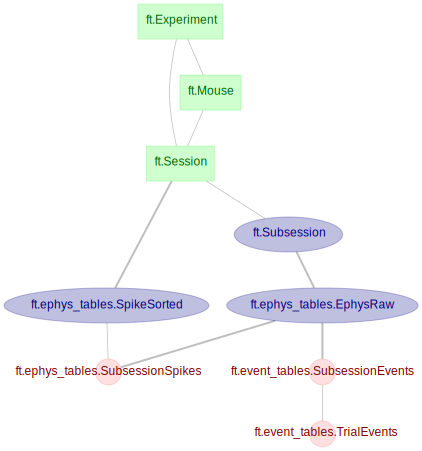

In [3]:
print(dj.list_schemas())
dj.Di(ft.schema)

In [6]:
exp_table = ft.Experiment()
sess_table = ft.Session()
mouse_table = ft.Mouse()
subsess_table = ft.Subsession()
raw_table = ft.ephys_tables.EphysRaw()
subsess_events_table = ft.event_tables.SubsessionEvents()
subsess_spikes_table = ft.ephys_tables.SubsessionSpikes()
trial_events_table = ft.event_tables.TrialEvents()

sorted_table = ft.ephys_tables.SpikeSorted()

In [7]:
subsess_spikes_table

experiment_id,mouse_id,session_id,subsession_id,subsession_type,start_abs,clusters,cluster_annot
01231,M01,20200327a,CHPE_0010,CHPE,0,=BLOB=,=BLOB=
01231,M01,20200327a,DIMK_0014,DIMK,9960960,=BLOB=,=BLOB=
01231,M01,20200327a,DIMM_0004,DIMM,11853000,=BLOB=,=BLOB=
01231,M01,20200327a,EXPA_0002,EXPA,13280712,=BLOB=,=BLOB=
01231,M01,20200327a,EXPB_0015,EXPB,14774268,=BLOB=,=BLOB=
01231,M01,20200327a,EXPK_0011,EXPK,16631460,=BLOB=,=BLOB=
01231,M01,20200327a,EXPN_0007,EXPN,18480348,=BLOB=,=BLOB=
01231,M01,20200327a,EXPW_0005,EXPW,19919304,=BLOB=,=BLOB=
01231,M01,20200327a,MSDS_0003,MSDS,21537300,=BLOB=,=BLOB=
01231,M01,20200327a,MSSL_0009,MSSL,36300120,=BLOB=,=BLOB=


In [9]:
key = {'experiment_id': '01231', 'session_id': '20200327a', 'subsession_id': 'EXPA_0002'}
clusters, cluster_annot = (subsess_spikes_table & key).fetch1('clusters', 'cluster_annot')
# trials = (trial_events_table & key).fetch1('events')
# stims_start, stim_triggers = (subsess_spikes_table & key).fetch1('stims_start', 'stim_triggers')

In [10]:
print(len([annot for annot in list(cluster_annot.values()) if annot == 'good']))
print(len(cluster_annot))

203
443


In [54]:
for c in clusters.keys():
    clusters[c] = clusters[c][clusters[c] >= stims_start]
    clusters[c] = clusters[c] - stims_start
stim_triggers = stim_triggers - stims_start

In [55]:
stim_triggers

array([   33403,    33935,    43430,    58936,   104435,   113928,
         129435,   174935,   184429,   199934,   245435,   254929,
         270435,   315511,  7035688,  7036400,  7045894,  7061399,
        7106899,  7116394,  7131891,  7177402,  7186893,  7202393,
        7247898,  7257393,  7272898,  7317994, 13168146, 19018314,
       19018838, 19028331, 19043838, 19089336, 19098832, 19114336,
       19159837, 19169331, 19184837, 19230336, 19239831, 19255336,
       19300412, 26290593, 26290799, 26300294, 26315800, 26361299,
       26370794, 26386299, 26431799, 26441293, 26456799, 26502298,
       26511793, 26527299, 26572376, 32272538, 32272769, 32282263,
       32297769, 32343268, 32352764, 32368268, 32413767, 32423263,
       32438768, 32484271, 32493762, 32509268, 32554345, 37414500,
       37415243, 37424737, 37440242, 37485742, 37495236, 37510737,
       37556241, 37565740, 37581241, 37626740, 37636236, 37651741,
       37696836, 43816989, 50447166, 50447674, 50457178, 50472

229


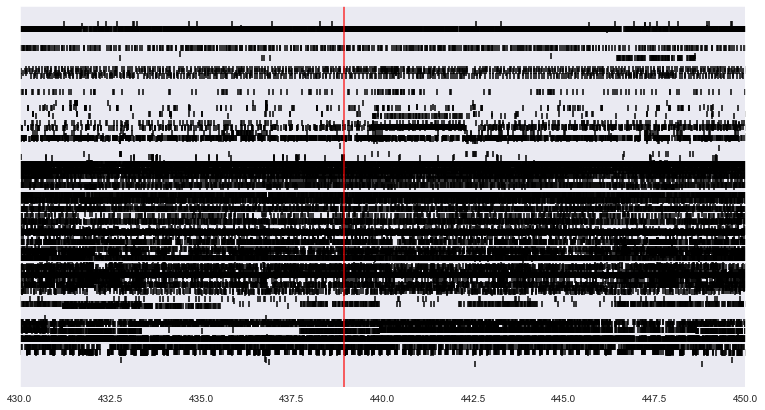

In [72]:
data = []

for c in cluster_annot:
    if cluster_annot[c] == 'good':
        data.append((c, clusters.get(c)))
fig, ax = plt.subplots(figsize=(13, 7))
print(len(data))
for i, (cluster, cl_spike_times) in enumerate(data[:]):
    if cl_spike_times is not None and isinstance(cl_spike_times, np.ndarray):
#         fr, _ = np.histogram(cl_spike_times, bins=np.arange(0, np.array(cl_spike_times)[-1], 30*50))
#         plt.plot(fr*10+cluster)
        ax.scatter(np.array(cl_spike_times)/30000, np.ones_like(cl_spike_times)*cluster*1, marker='|', c='k') # SCATTER PLOT

# ax.axvline(stimgroup_start/30000, ymin=0, ymax=1, c='b', alpha=1)  
for trigger in stim_triggers:
    ax.axvline(trigger/30000, ymin=0, ymax=1, c='r', alpha=0.8) # FOR SCATTER PLOT SET DIVIDOR TO 30000
#     ax.axvline(trigger/(30*50), ymin=0, ymax=1, c='r')

# plt.xlim(2,16)
plt.yticks([])
plt.xlim(430, 450)
# plt.xlabel('time')
# plt.ylabel('neurons')
# plt.savefig('spikes_SC.png', dpi=200)
plt.show()

In [20]:
cluster_annot.values()

dict_values(['mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'good', 'mua', 'good', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'good', 'mua', 'mua', 'mua', 'mua', 'good', 'mua', 'mua', 'mua', 'mua', 'good', 'good', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'good', 'good', 'good', 'good', 'mua', 'good', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'good', 'mua', 'mua', 'good', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'good', 'good', 'good', 'good', 'mua', 'mua', 'good', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'good', 'mua', 'mua', 'mua', 'good', 'mua', 'good', 'good', 'good', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'good', 'good', 'good', 'mua', 'mua', 'good', 'mua', 'good', 'mua', 'mua', 'mua', 'mua', 'good', 'mua', 'good', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'mua', 'good', 'mua', 'mua', 'mua', 'mua

In [1]:
spike_times.shape

NameError: name 'spike_times' is not defined

In [5]:
events_table.populate()

Populated a trial for 20201214b in 01437
Error occurred when loading events end. index 0 is out of bounds for axis 0 with size 0
Populated a trial for 20201214b in 01437
Populated a trial for 20201214b in 01437
Error occurred when loading events end. index 0 is out of bounds for axis 0 with size 0
Populated a trial for 20201214b in 01437


In [74]:
exp_table

experiment_id,description,experimenters name of the experimenters
01437,GRP-optotagged,Anna Chrzanowska


In [6]:
events_table

experiment_id,mouse_id,session_id,trialgroup_id,stimulus_type,start_abs,stims_start,stims_end,stim_triggers
01437,M02,20201214b,EXD1_0001,EXD1,0,29996,-1,=BLOB=
01437,M02,20201214b,EXD2_0001,EXD2,63384371,30002,80376363,=BLOB=
01437,M02,20201214b,EXD3_0001,EXD3,144285767,30006,-1,=BLOB=
01437,M02,20201214b,OPTS_0001,OPTS,205696127,29999,280143,=BLOB=


In [19]:
subsess_table

experiment_id,mouse_id,session_id,subsession_id,type,iteration
01437,M02,20201214,EXD_1_0001,EXD,1
01437,M02,20201214,EXD_2_0001,EXD,2
01437,M02,20201214,EXD_3_0001,EXD,3
01437,M02,20201214,OPTS_1_0001,OPTS,1


In [10]:
# key = {'session_id': '20201214', 'subsession_id': 'OPTS_1_0001'}
key = {'experiment_id': '01231', 'session_id': '20200327a', 'subsession_id': 'EXPA_0002'}
# key = {'experiment_id': '01231', 'session_id': '20200327a', 'subsession_id': 'CHPE_0010'}

sync_trace = (raw_table & key).fetch1('sync_trace')
# trials_starts, trials_stops = (subsess_events_table & key).fetch1('trials_starts', 'trials_ends')

In [7]:
sync_trace.shape

(16, 1493556)

In [8]:
import numpy as np
import os
import scipy.io

In [9]:
sync = np.diff(sync_trace, prepend=0)
len(np.where(sync[7]>0.5)[0])

33

In [13]:
triggers, trials_starts, trials_stops = (subsess_events_table & key).fetch1('subsession_triggers', 'trials_starts', 'trials_ends')

In [17]:
triggers[7]

array([  63446,   63941,   73441,   88940,  179440,  188934,  204435,
        294939,  304433,  319939,  410438,  419933,  435433,  525937,
        535432,  550938,  641436,  650932,  666437,  756936,  766430,
        781936,  872435,  881930,  897436,  987935,  997429, 1012935,
       1103435, 1112929, 1128434, 1218509, 1218580], dtype=int64)

In [20]:
np.diff(triggers[7])

array([  495,  9500, 15499, 90500,  9494, 15501, 90504,  9494, 15506,
       90499,  9495, 15500, 90504,  9495, 15506, 90498,  9496, 15505,
       90499,  9494, 15506, 90499,  9495, 15506, 90499,  9494, 15506,
       90500,  9494, 15505, 90075,    71], dtype=int64)

In [12]:
trials_starts

array([  63941,  179440,  294939,  410438,  525937,  641436,  756936,
        872435,  987935, 1103435, 1218509], dtype=int64)

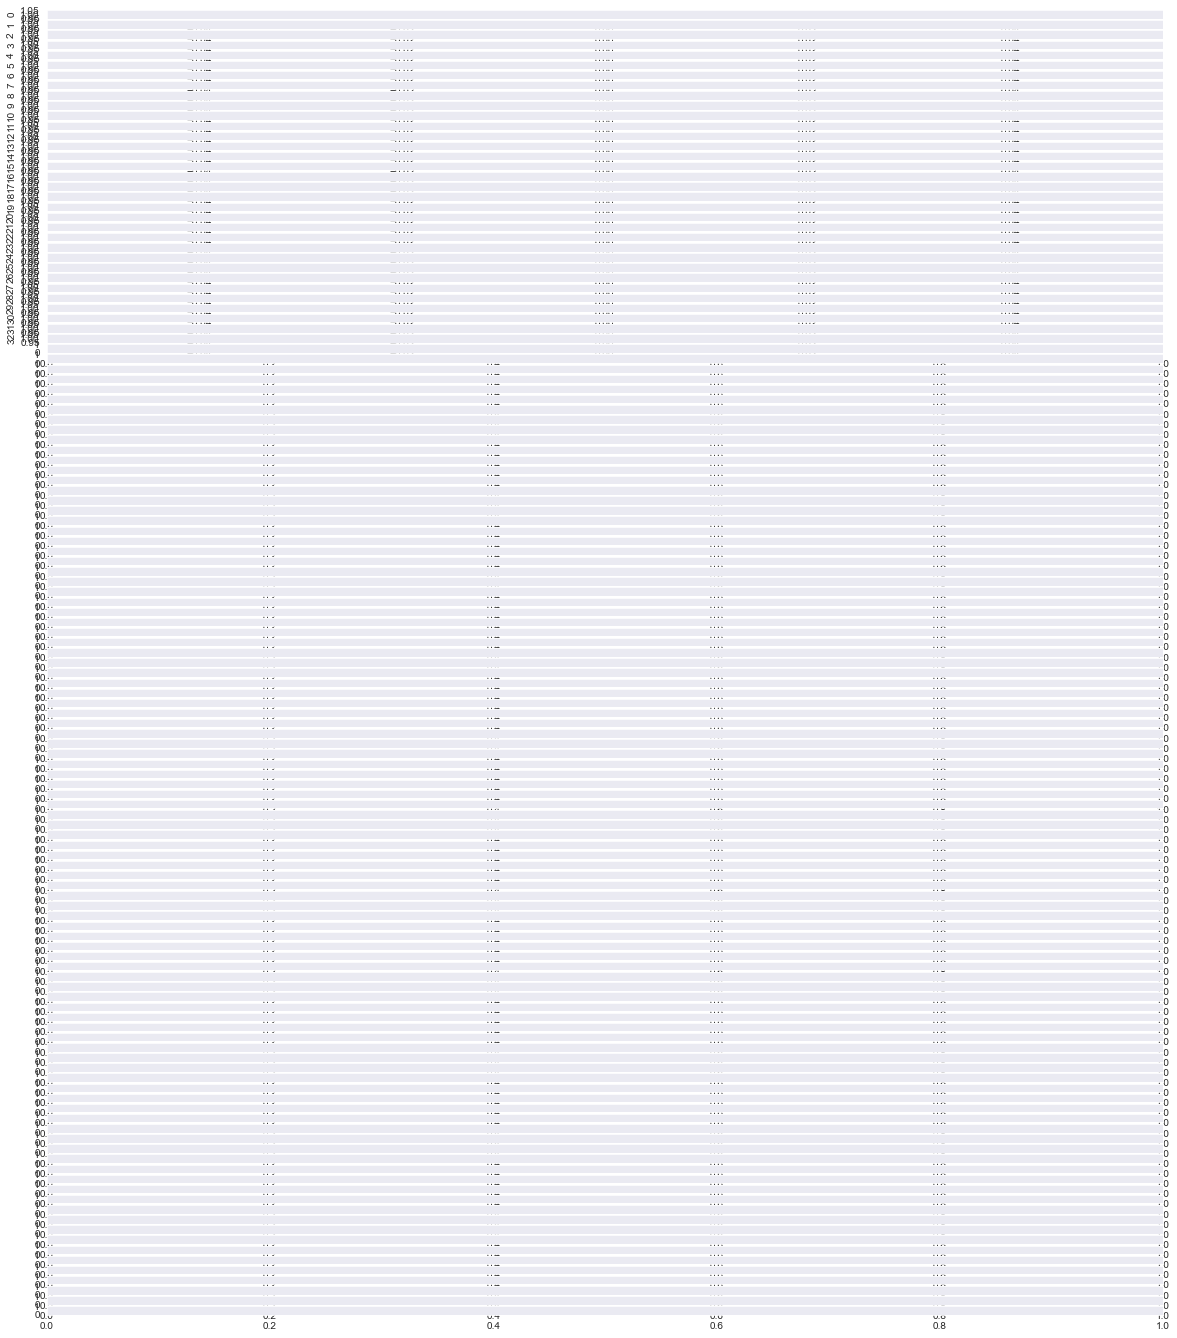

In [38]:
trigger_idxs = np.where(sync[7]>0.5)[0]
fig, axs = plt.subplots(129, 1, figsize=(20, 24))

for i, idx in enumerate(trigger_idxs[:129]):
    axs[i].plot(sync_trace[7][idx])
    axs[i].set_ylabel(i)
plt.show()

In [9]:
def load_stimtypes_from_stimlog(stimlog_folder, stimlog_name, stimlog_iter):
    stimlogs = [filename for filename in os.listdir(stimlog_folder) if stimlog_name+f"{stimlog_iter:04d}" in filename]
    print(stimlogs)
    stimlog_path = os.path.join(stimlog_folder, stimlogs[0])
    mat = scipy.io.loadmat(stimlog_path, squeeze_me=True)
    stim_info = mat['StimLog']['Stim']
    stimtypes = np.atleast_1d(stim_info)[0]['StimType']
    return stimtypes
stimtypes = load_stimtypes_from_stimlog(r'V:\Data\01437\M02\20201214\StimLog', 'EXPAandDIMM', 1)

['0001EXPAandDIMM0001_CollisionAndDimming_StimLog20201214T181652.mat']


In [10]:
stimtypes.shape

120 + 10

130

In [9]:
list(zip(trials_starts, trials_stops))

[(669717, 699149),
 (1300406, 1329838),
 (1931095, 1960527),
 (2561784, 2591216),
 (3192473, 3221905),
 (3823162, 3852594),
 (4453851, 4483283),
 (5084539, 5113971),
 (5715228, 5744660),
 (6345917, 6375349),
 (6976606, 7006038),
 (7607295, 7636727),
 (8237984, 8267416),
 (8868673, 8898105),
 (9499362, 9528794),
 (10130051, 10159483),
 (10760740, 10790172),
 (11391429, 11420861),
 (12022118, 12051550),
 (12652806, 12682239),
 (13283495, 13312928),
 (13914184, 13943617),
 (14544873, 14574305),
 (15175562, 15204994),
 (15806251, 15835684),
 (16436940, 16466373),
 (17067629, 17097062),
 (17698319, 17727751)]

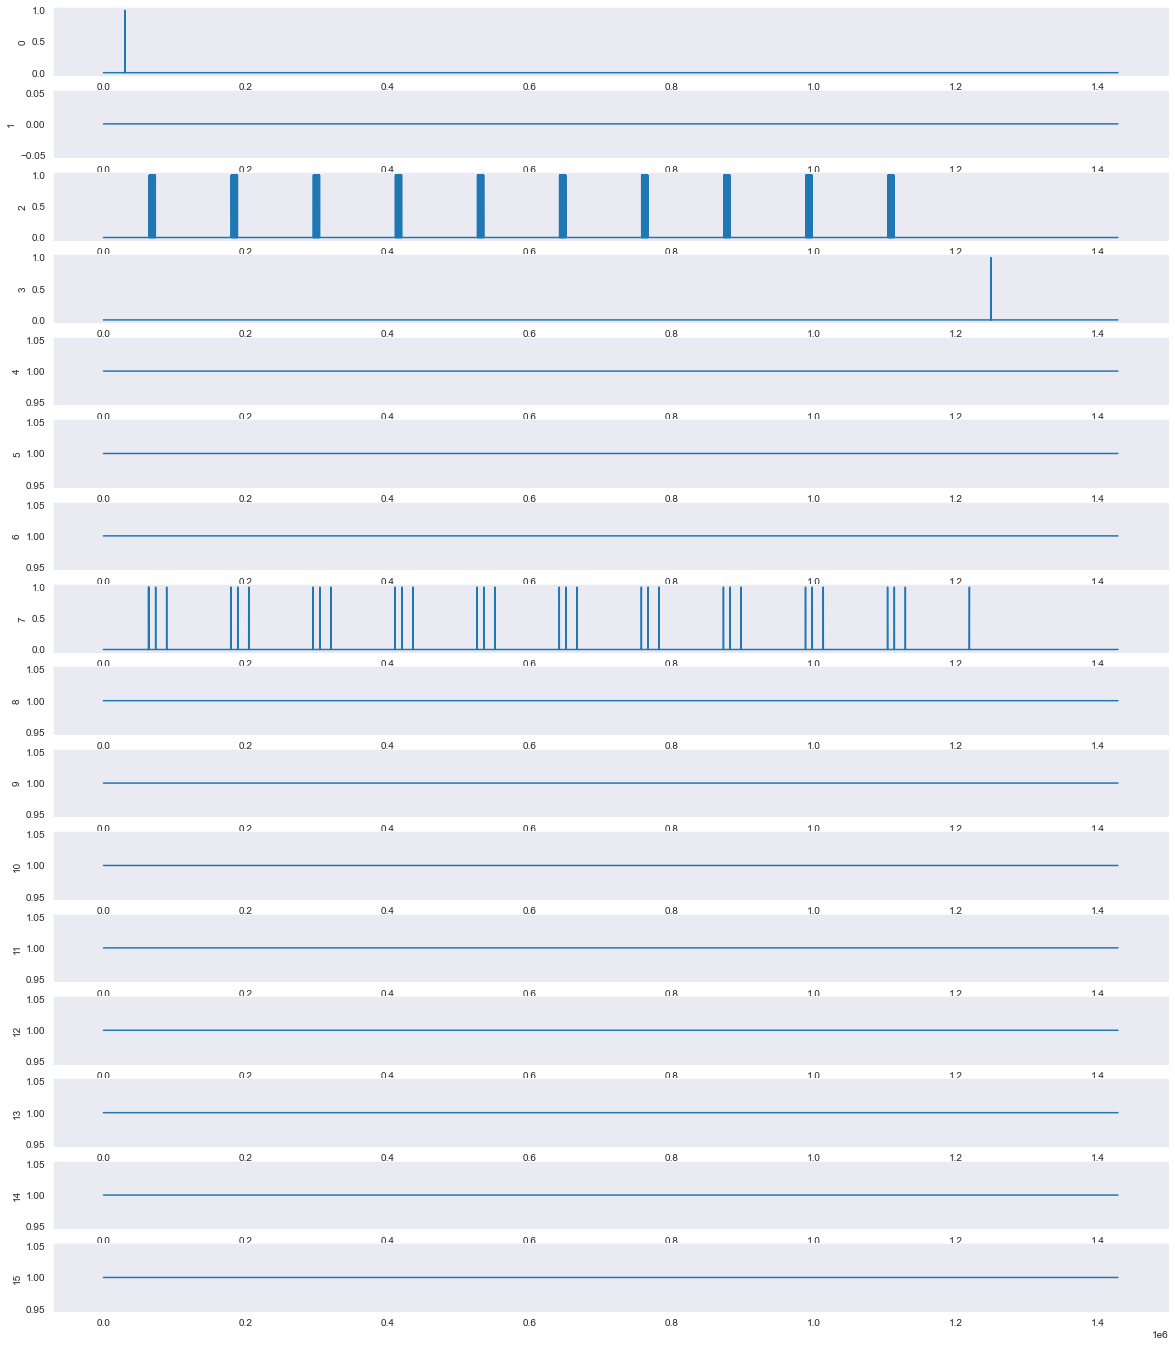

In [62]:
fig, axs = plt.subplots(16, 1, figsize=(20, 24))
for i, signal in enumerate(sync_trace):
#     axs[i].plot(signal[60000:1000000-930000])
    axs[i].plot(signal)
    axs[i].set_ylabel(i)
plt.show()